<h1 align="center"><span style='font-family:sans-serif'>Museum Visits Analysis</h1>

<h3 align="center"><span style='font-family:sans-serif'>October 2022</h3>

### Importing Libraries

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [8]:
# Reading and indexing file in order of date
visitors = pd.read_csv('museum_visitors.csv')

In [10]:
# Viewing the first 5 rows of the DataFrame
visitors.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [11]:
# Viewing the last 5 rows of the DataFrame
visitors.tail()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
54,2018-07-01,23136,4191,2620,4718
55,2018-08-01,20815,4866,2409,3891
56,2018-09-01,21020,4956,2146,3180
57,2018-10-01,19280,4622,2364,3775
58,2018-11-01,17163,4082,2385,4562


### Analysing the data

In [12]:
visitors.shape

(59, 5)

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  59 non-null     object
 1   Avila Adobe                           59 non-null     int64 
 2   Firehouse Museum                      59 non-null     int64 
 3   Chinese American Museum               59 non-null     int64 
 4   America Tropical Interpretive Center  59 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


In [14]:
# Change Date time datatype from string to date time
visitors['Date'] = visitors['Date'].astype('datetime64[ns]')

In [15]:
# View of categorical columns
categories = [fea for fea in visitors.columns if visitors[fea].dtype == 'O']
categories

[]

In [16]:
# View of numerical columns
values = [fea for fea in visitors.columns if visitors[fea].dtype != 'O']
values

['Date',
 'Avila Adobe',
 'Firehouse Museum',
 'Chinese American Museum',
 'America Tropical Interpretive Center']

In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  59 non-null     datetime64[ns]
 1   Avila Adobe                           59 non-null     int64         
 2   Firehouse Museum                      59 non-null     int64         
 3   Chinese American Museum               59 non-null     int64         
 4   America Tropical Interpretive Center  59 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.4 KB


#### Information on the Museum Visitors Dataset

    - There are 59 rows and 5 columns. The date spans from 01 January 2014 to 01 Novemeber 2018.
    - There are 3 intergers and 1 datetime types. 
    - All the data types numerical.

### Data Cleaning

In [17]:
# check for duplicates
visitors.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
dtype: bool

In [18]:
# Checking for missing values using a function 
def missing_num(x):
    return sum(x.isna())

print('Missing values per column')

print(visitors.apply(missing_num, axis = 0).where(lambda x: x!=0).dropna())

Missing values per column
Series([], dtype: float64)


#### There are no duplicates and missing values.

### Plotting

In [ ]:
# Describing the numerical values
visitors.describe()

In [ ]:
# Looking for possible relationships between variables
visitors.corr()

#### Correlated Variables
        Strong Positive
        0.666140 "Avila Adobe" and 'America Tropical Interpretive Center'
    

### The Plots

In [31]:
# Setting the theme
sns.set_theme()
# For image quality of the graphics
sns.set(rc = {"figure.dpi":350})
# For size of the graphics
sns.set(rc = {"figure.figsize":(6,3)})

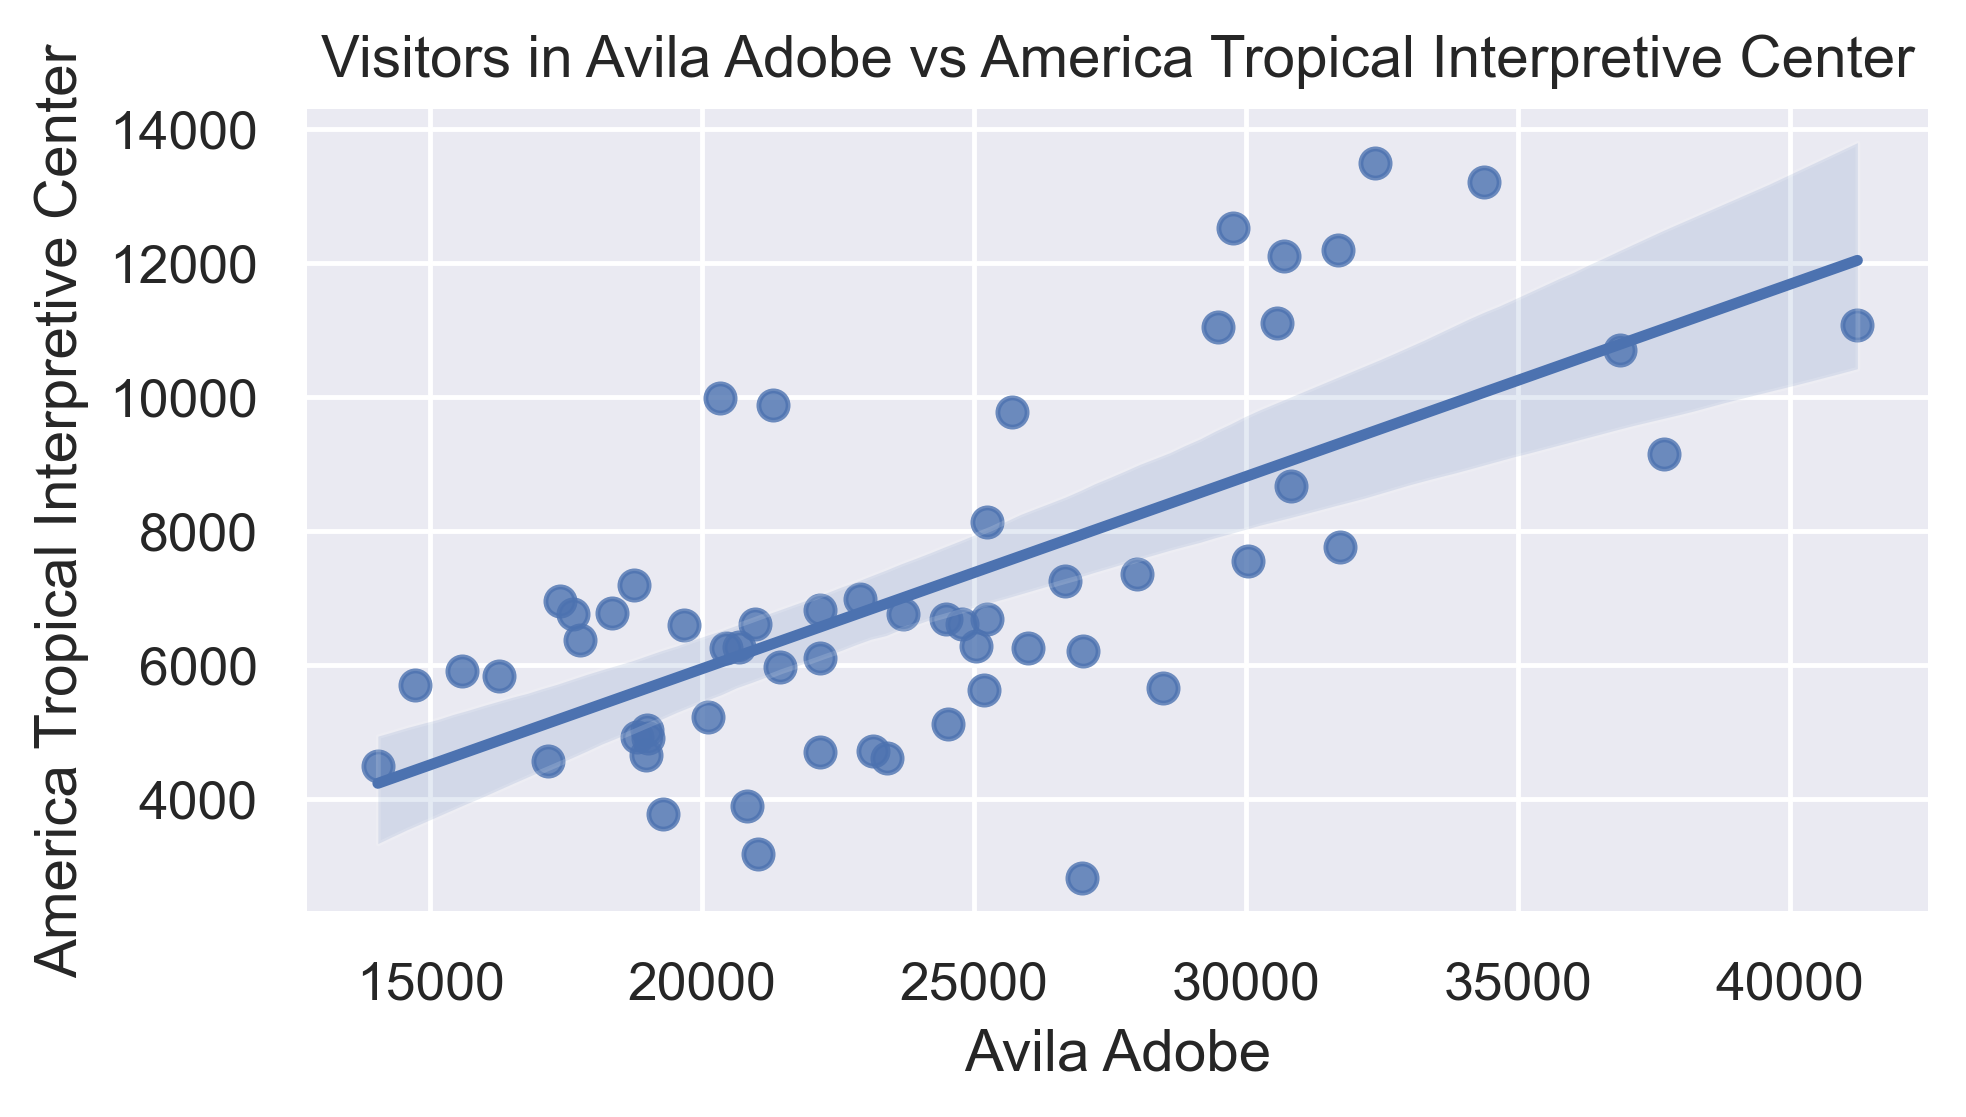

In [27]:
# Relationship between two variables
plt.title("Visitors in Avila Adobe vs America Tropical Interpretive Center")
sns.regplot(x = "Avila Adobe", y = "America Tropical Interpretive Center", data = visitors);

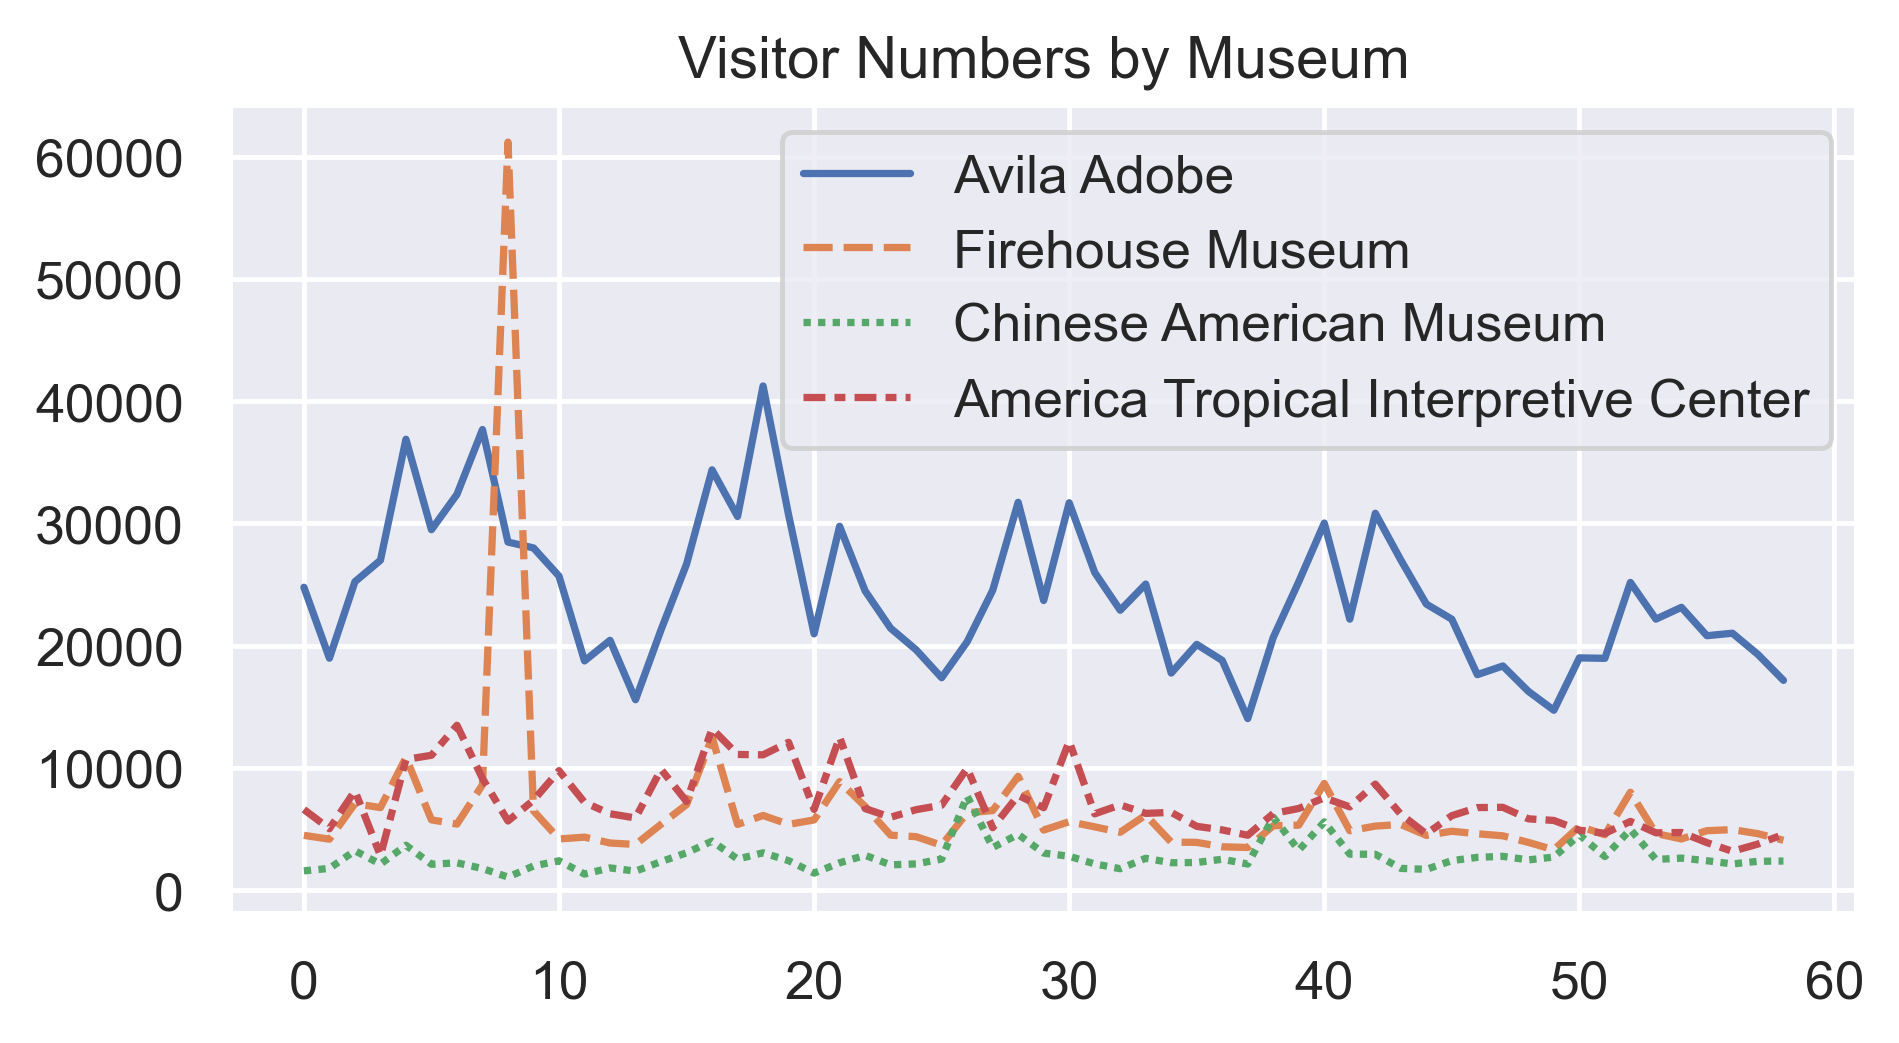

In [22]:
# Line plot
plt.title("Visitor Numbers by Museum")
sns.lineplot(data = visitors);

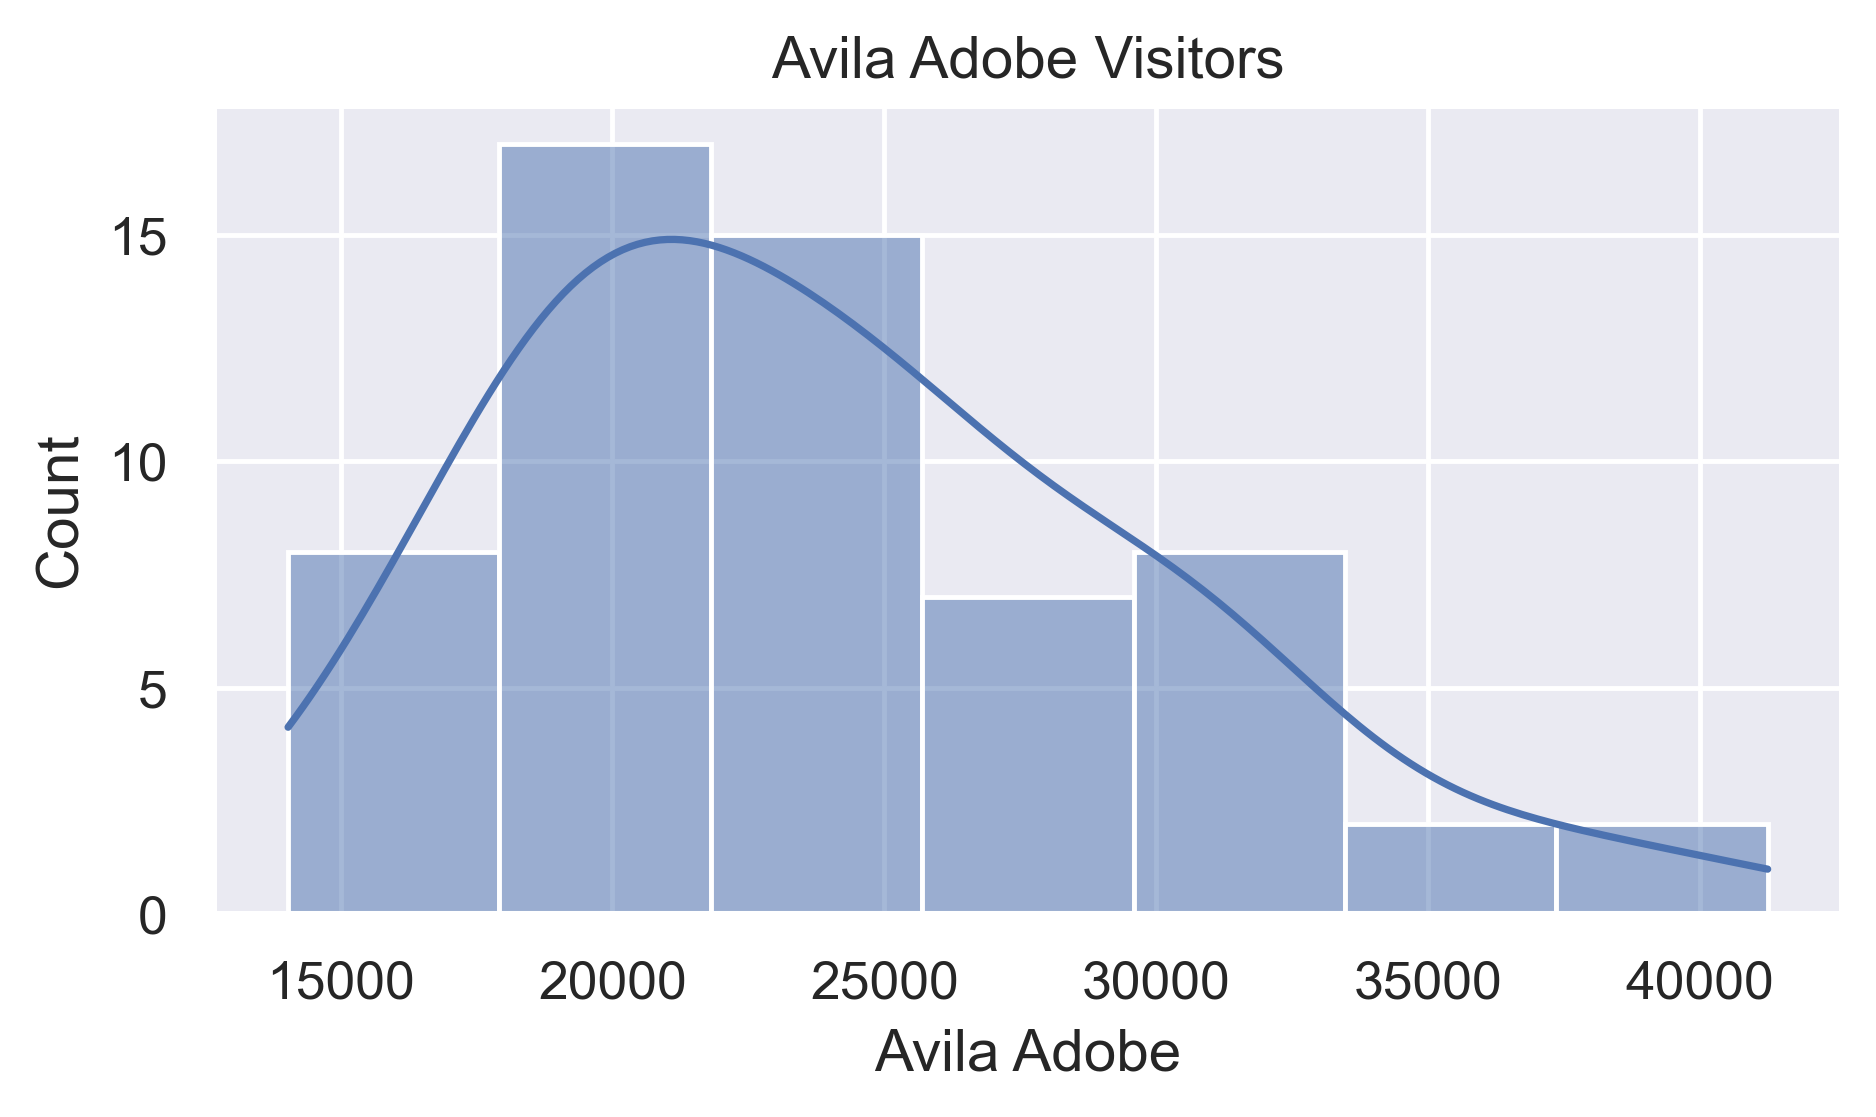

In [32]:
# Looking at probability distribution of the curve
plt.title("Avila Adobe Visitors")
sns.histplot( x = "Avila Adobe", data = visitors, kde=True);

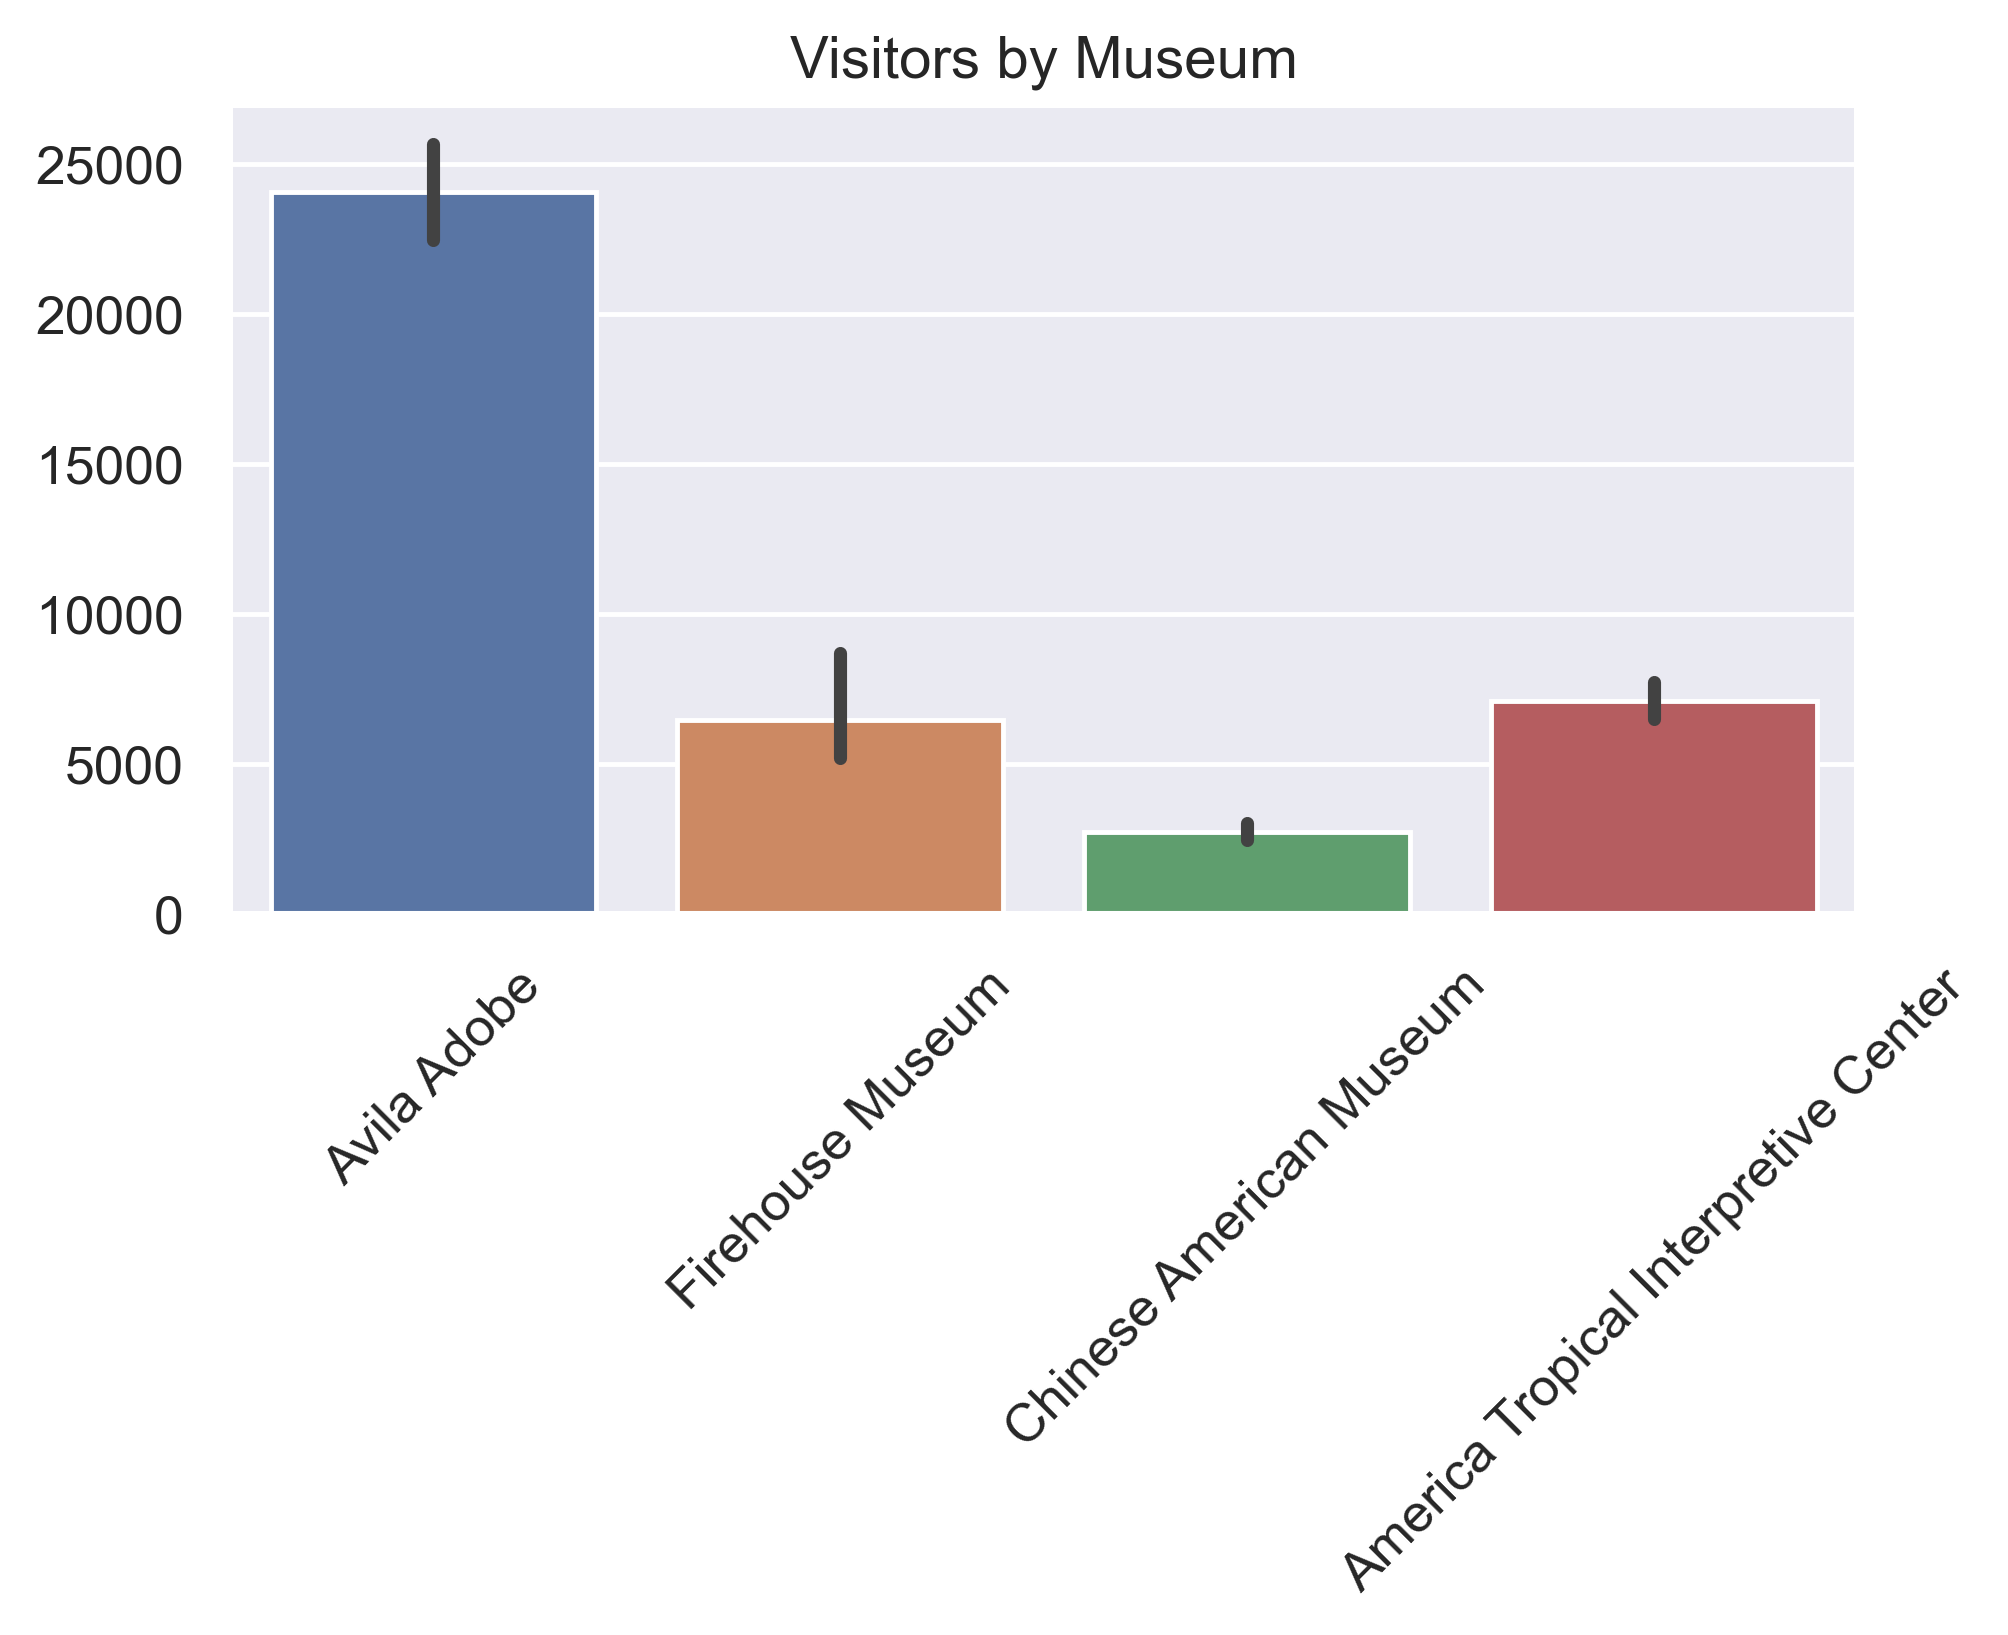

In [28]:
plt.title("Visitors by Museum")
ax = sns.barplot(data=visitors)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

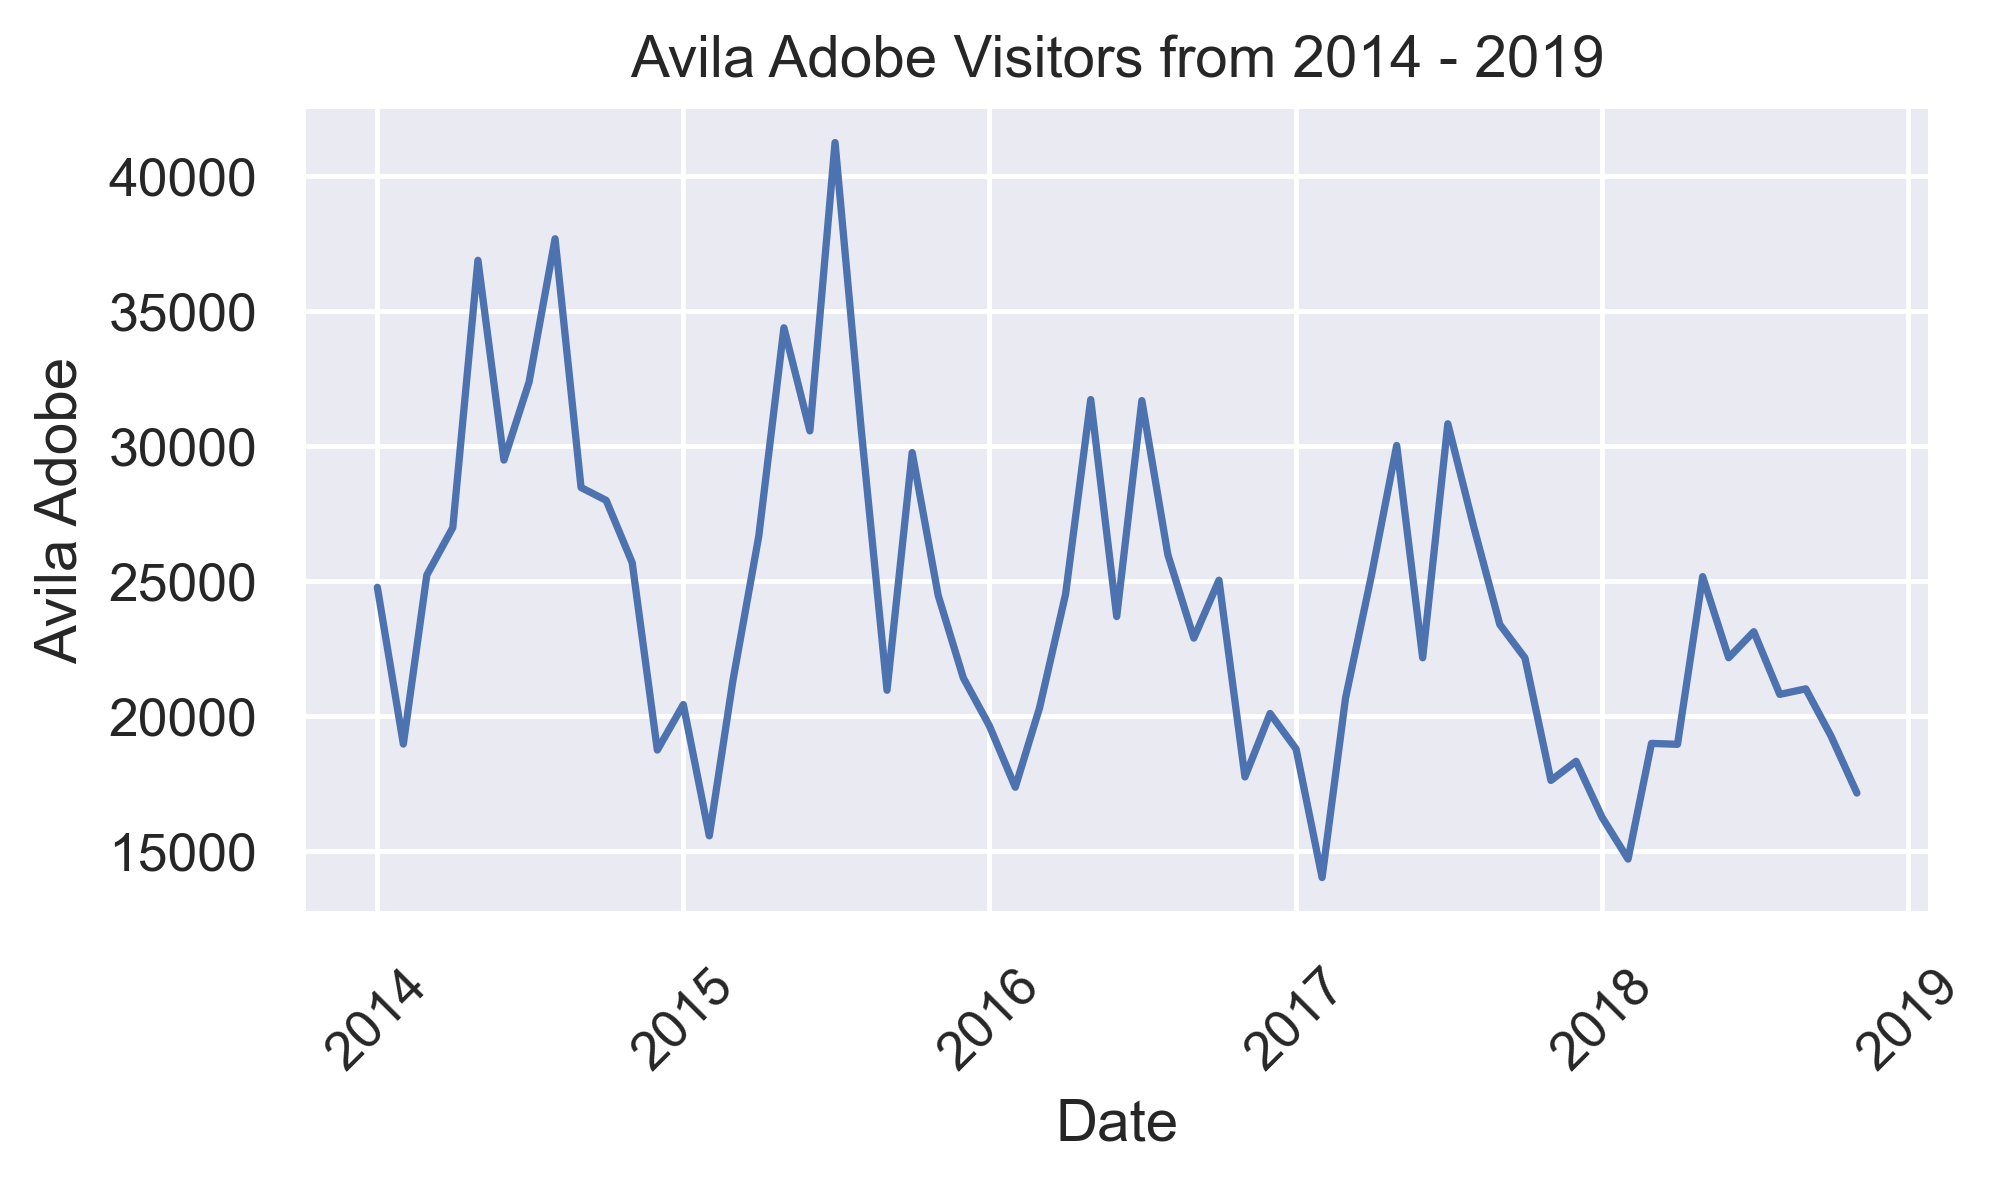

In [29]:
plt.title("Avila Adobe Visitors from 2014 - 2019")
ax = sns.lineplot(data=visitors, x='Date', y='Avila Adobe')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

### Looking for outliers

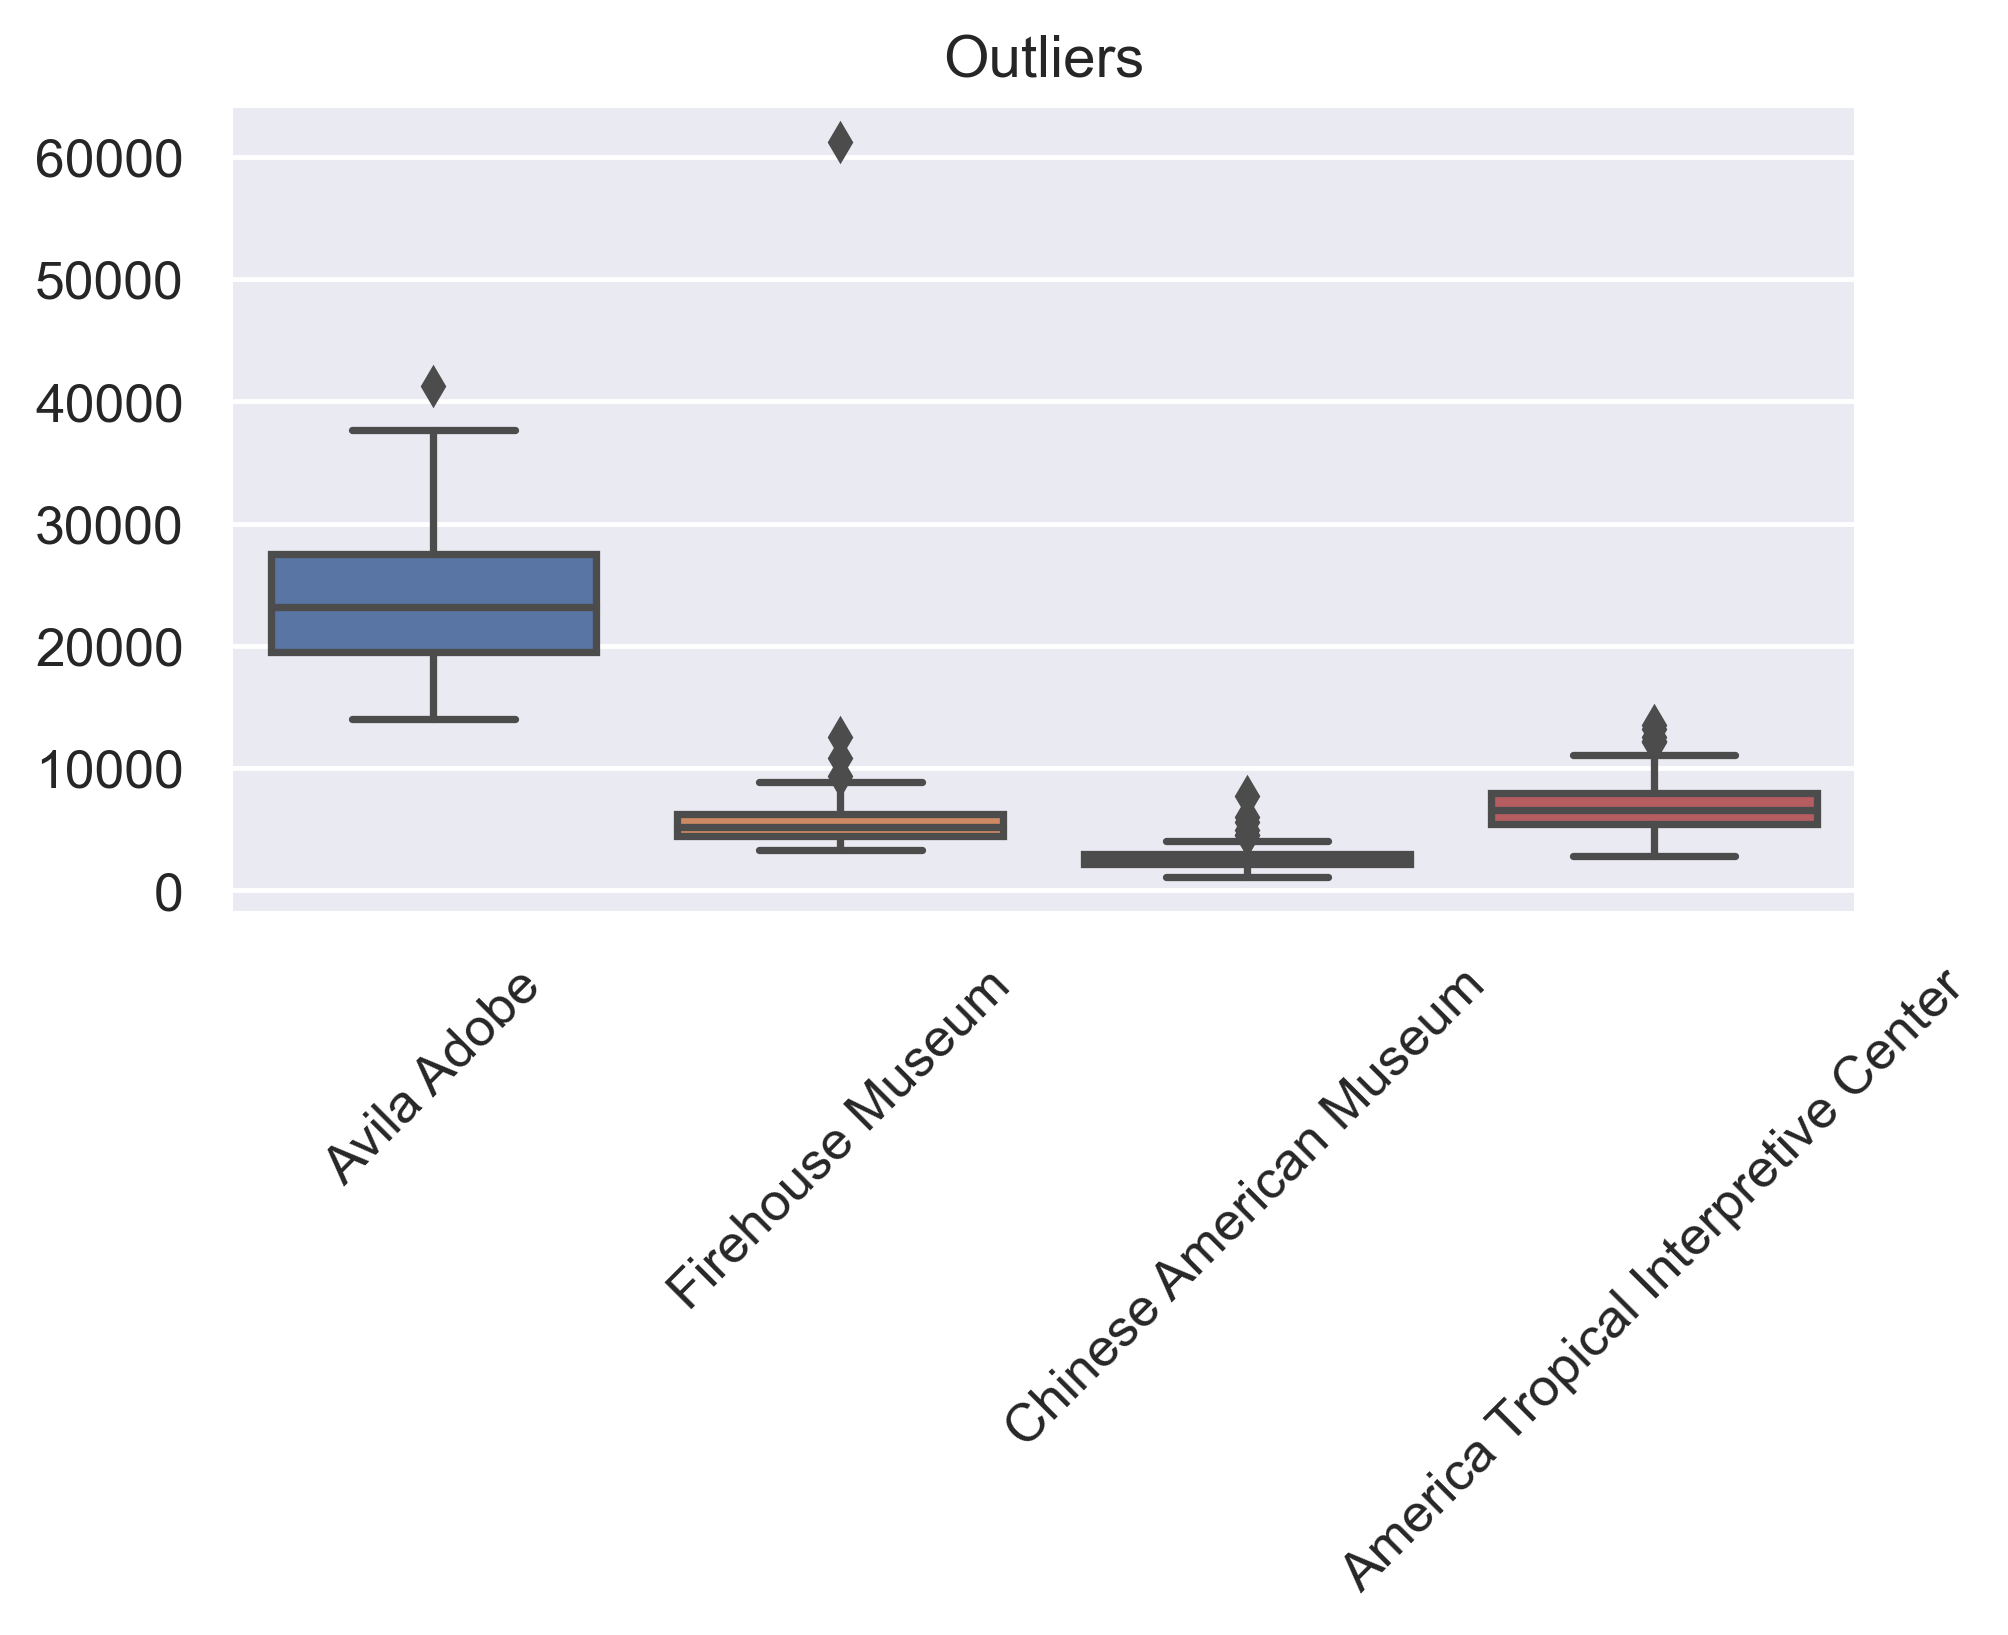

In [30]:
plt.title("Outliers")
ax = sns.boxplot(data=visitors)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45);